# Polynomial Regression

## Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

## Importing the dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

### Plotting the data distribution

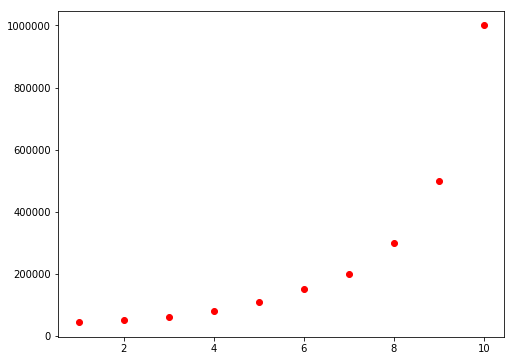

In [3]:
plt.figure(figsize=(8,6))
plt.scatter(X, y, color = 'red')
plt.show()

### Splitting the dataset into the Training set and Test set

##### Since we need the entire dataset for training (for this particular problem), we will not split the data into training and test sets

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Fitting Linear Regression to the dataset

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Visualising the Linear Regression results

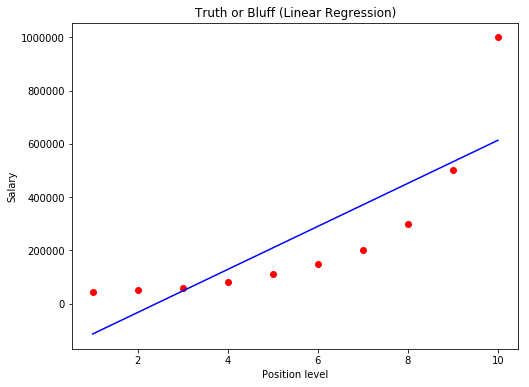

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')

plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Fitting Polynomial Regression to the dataset

In [7]:
from sklearn.preprocessing import PolynomialFeatures
poly_trans = PolynomialFeatures(degree = 12)
X_poly = poly_trans.fit_transform(X)

# Fitting the higher order terms to the model
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Visualising the Polynomial Regression results

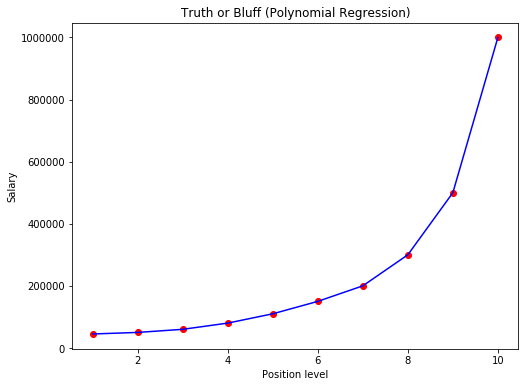

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(X, y, color = 'red')
plt.plot(X, poly_reg.predict(poly_trans.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

#### As we can see above, the higher degrees of the expression leads to better fit. This however, can also culminate into a over-fitted model. 

##### Please ensure that the regressor is not overfitted to suit the training data

## Predicting a new result with Linear Regression

In [9]:
lin_reg.predict(np.array([[10]]))

array([613454.54545455])

## Predicting a new result with Polynomial Regression

In [10]:
poly_reg.predict(poly_trans.fit_transform(np.array([[10]])))

array([999999.99979806])

# Residuals

### Linear Regression Residuals Plot

In [11]:
linear_regression_residuals = y - lin_reg.predict(X)

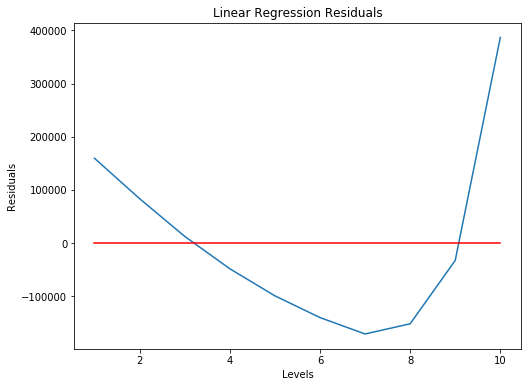

In [12]:
plt.figure(figsize=(8,6))
plt.plot(X, linear_regression_residuals)
plt.plot(X, [0]*len(X), color='r')
plt.title("Linear Regression Residuals")
plt.xlabel("Levels")
plt.ylabel("Residuals")
plt.show()

### Polynomial Regression Residuals Plot

In [13]:
polynomial_regression_residuals = y - poly_reg.predict(poly_trans.fit_transform(X))

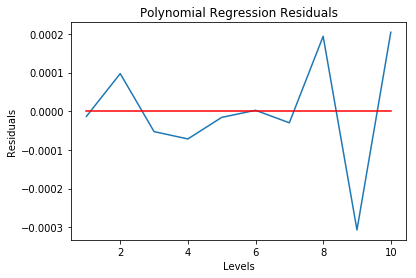

In [14]:
plt.figure(figsize=(6,4))
plt.plot(X, polynomial_regression_residuals)
plt.plot(X, [0]*len(X), color='r')
plt.title("Polynomial Regression Residuals")
plt.xlabel("Levels")
plt.ylabel("Residuals")
plt.show()

In [15]:
residuals = pd.DataFrame(columns=['Linear', 'Polynomial'], index=dataset.Level)


In [16]:
residuals['Linear'] = linear_regression_residuals
residuals['Polynomial'] = polynomial_regression_residuals
residuals

,Linear,Polynomial
Level,,
1,159454.545455,-0.000013
2,83575.757576,0.000097
3,12696.969697,-0.000053
4,-48181.818182,-0.000072
5,-99060.606061,-0.000016
6,-139939.393939,0.000003
7,-170818.181818,-0.000030
8,-151696.969697,0.000194
9,-32575.757576,-0.000307


## Plot of Residuals

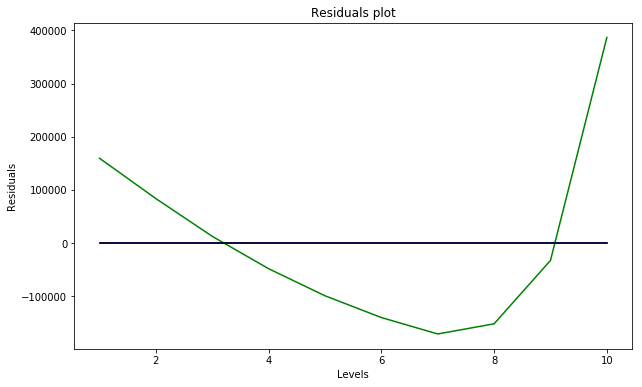

In [17]:
plt.figure(figsize=(10,6))
plt.plot(X, linear_regression_residuals, color='green')
plt.plot(X, polynomial_regression_residuals, color='blue')
plt.plot(X, [0] * len(X), color='black')
plt.title("Residuals plot")
plt.xlabel("Levels")
plt.ylabel("Residuals")
plt.show()